## <span style="color:#957DAD">Índice</span>

### Contenido

+ <a href="#Lectura" style="color:#E18AAA"><b>Leer archivos de alineamiento de secuencias</b></a>
    + <a href="#Uno" style="color:#E18AAA">Un solo alineamiento</a>
    + <a href="#Muchos" style="color:#E18AAA">Alineamiento múltiple</a>
+ <a href="#Ambiguo" style="color:#E18AAA"><b>Lidiar con secuencias ambiguas</b></a>
+ <a href="#Escribir" style="color:#E18AAA"><b>Escritura de archivos</b></a>
+ <a href="#Conversion" style="color:#E18AAA"><b>Conversión de archivos</b></a>
+ <a href="#Manipulacion" style="color:#E18AAA"><b>Manipulación de alineamientos</b></a>
+ <a href="#Herramientas" style="color:#E18AAA"><b>Herramientas para alinear</b></a>



### Ejercicio/Tarea
+ <a href="#Ejercicio" style="color:#058B8C"><b>Ejercicio</b></a>


<a id="Lectura"></a>

# <span style="color:#D291BC">Parsing or Reading - Alineamientos de secuencias</span>

--------------------------------------

We have two functions for reading in sequence alignments,
`Bio.AlignIO.read()` and `Bio.AlignIO.parse()` which following the
convention introduced in `Bio.SeqIO` are for files containing one or
multiple alignments respectively.

Both functions expect two mandatory arguments:

1.  The first argument is a <span>*handle*</span> to read the data from,
    typically an open file or
    a filename.

2.  The second argument is a lower case string specifying the
    alignment format. As in `Bio.SeqIO` we don’t try and guess the file
    format for you! See <http://biopython.org/wiki/AlignIO> for a full
    listing of supported formats.

There is also an optional `seq_count` argument which is discussed in
Section \[sec:AlignIO-count-argument\] below for dealing with ambiguous
file formats which may contain more than one alignment.

A further optional `alphabet` argument allowing you to specify the
expected alphabet. This can be useful as many alignment file formats do
not explicitly label the sequences as RNA, DNA or protein – which means
`Bio.AlignIO` will default to using a generic alphabet.

<a id="Uno"></a>

## <span style="color:#957DAD">Single Alignments</span>

As an example, consider the following annotation rich protein alignment
in the PFAM or Stockholm file format:

```
# STOCKHOLM 1.0
#=GS COATB_BPIKE/30-81  AC P03620.1
#=GS COATB_BPIKE/30-81  DR PDB; 1ifl ; 1-52;
#=GS Q9T0Q8_BPIKE/1-52  AC Q9T0Q8.1
#=GS COATB_BPI22/32-83  AC P15416.1
#=GS COATB_BPM13/24-72  AC P69541.1
#=GS COATB_BPM13/24-72  DR PDB; 2cpb ; 1-49;
#=GS COATB_BPM13/24-72  DR PDB; 2cps ; 1-49;
#=GS COATB_BPZJ2/1-49   AC P03618.1
#=GS Q9T0Q9_BPFD/1-49   AC Q9T0Q9.1
#=GS Q9T0Q9_BPFD/1-49   DR PDB; 1nh4 A; 1-49;
#=GS COATB_BPIF1/22-73  AC P03619.2
#=GS COATB_BPIF1/22-73  DR PDB; 1ifk ; 1-50;
COATB_BPIKE/30-81             AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA
#=GR COATB_BPIKE/30-81  SS    -HHHHHHHHHHHHHH--HHHHHHHH--HHHHHHHHHHHHHHHHHHHHH----
Q9T0Q8_BPIKE/1-52             AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA
COATB_BPI22/32-83             DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA
COATB_BPM13/24-72             AEGDDP...AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
#=GR COATB_BPM13/24-72  SS    ---S-T...CHCHHHHCCCCTCCCTTCHHHHHHHHHHHHHHHHHHHHCTT--
COATB_BPZJ2/1-49              AEGDDP...AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA
Q9T0Q9_BPFD/1-49              AEGDDP...AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
#=GR Q9T0Q9_BPFD/1-49   SS    ------...-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH--
COATB_BPIF1/22-73             FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA
#=GR COATB_BPIF1/22-73  SS    XX-HHHH--HHHHHH--HHHHHHH--HHHHHHHHHHHHHHHHHHHHHHH---
#=GC SS_cons                  XHHHHHHHHHHHHHHHCHHHHHHHHCHHHHHHHHHHHHHHHHHHHHHHHC--
#=GC seq_cons                 AEssss...AptAhDSLpspAT-hIu.sWshVsslVsAsluIKLFKKFsSKA
//

```

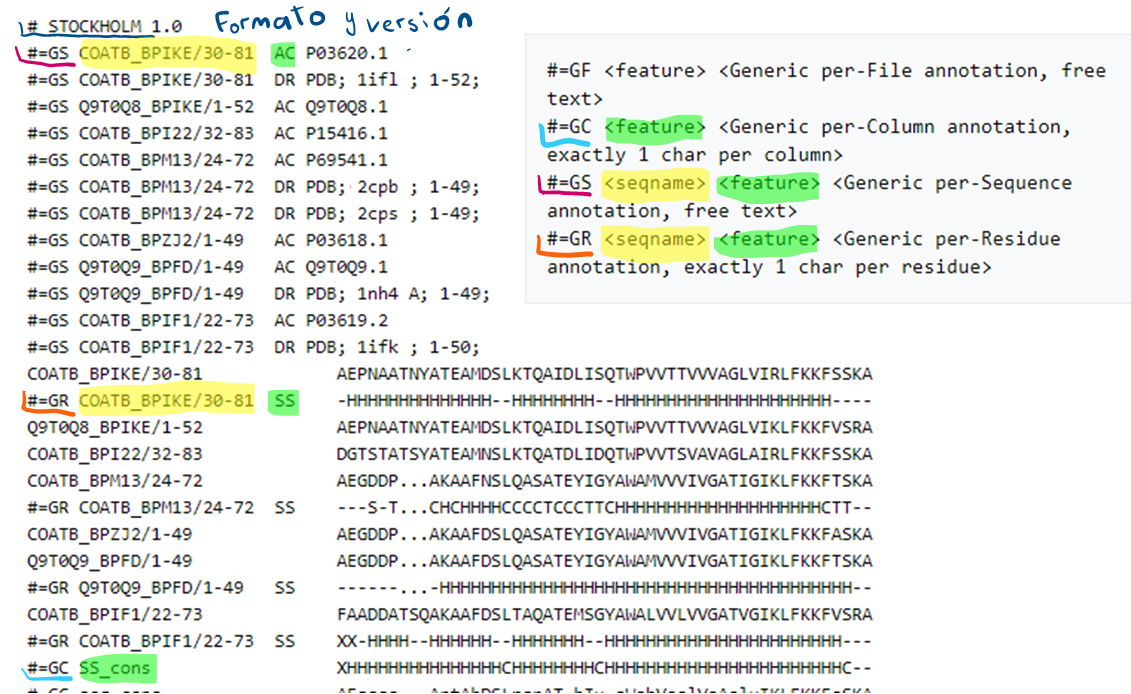

https://en.wikipedia.org/wiki/Stockholm_format#:~:text=Stockholm%20format%20is%20a%20multiple,protein%20and%20RNA%20sequence%20alignments.&text=Stockholm%20format%20files%20often%20have,stk.
AC:  Accession number

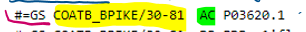

SS:Secondary Structure

The protein SS letters are taken from DSSP: H=alpha-helix, G=3/10-helix, I=p-helix, E=extended strand, B=residue in isolated b-bridge, T=turn, S=bend, C=coil/loop.)

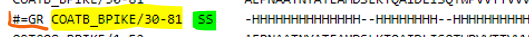

Son los alineamientos

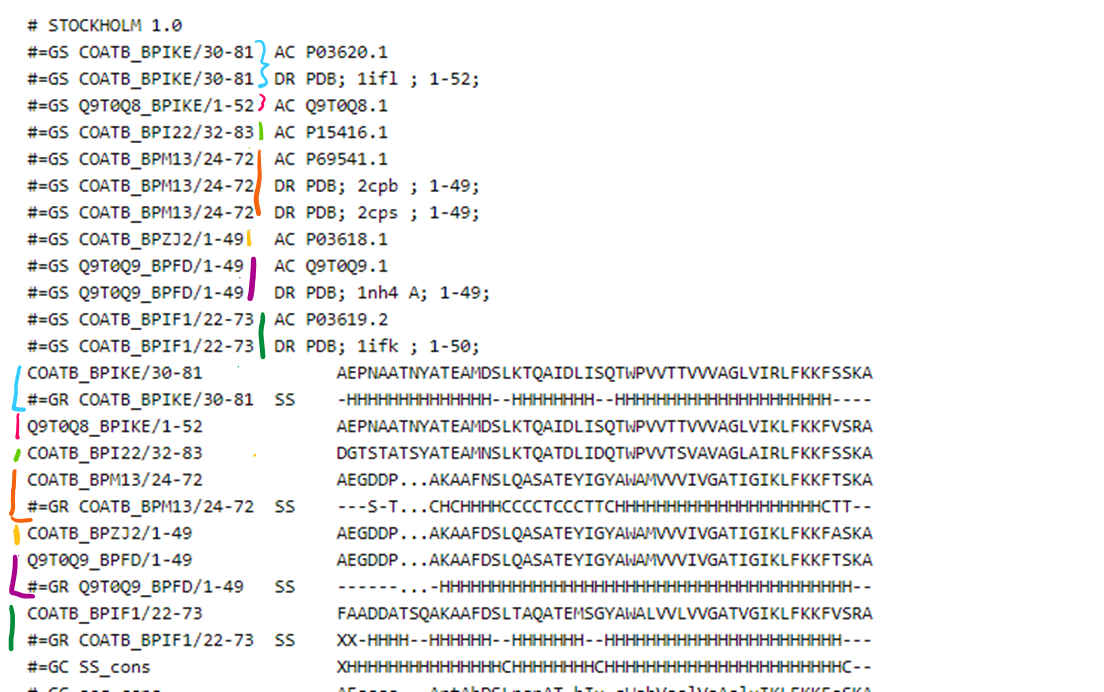



This is the seed alignment for the Phage\_Coat\_Gp8 (PF05371) PFAM
entry, downloaded from a now out of date release of PFAM from
<http://pfam.sanger.ac.uk/>. We can load this file as follows (assuming
it has been saved to disk as “PF05371\_seed.sth” in the current working
directory):



In [4]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")


This code will print out a summary of the alignment:



In [6]:
print(alignment)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


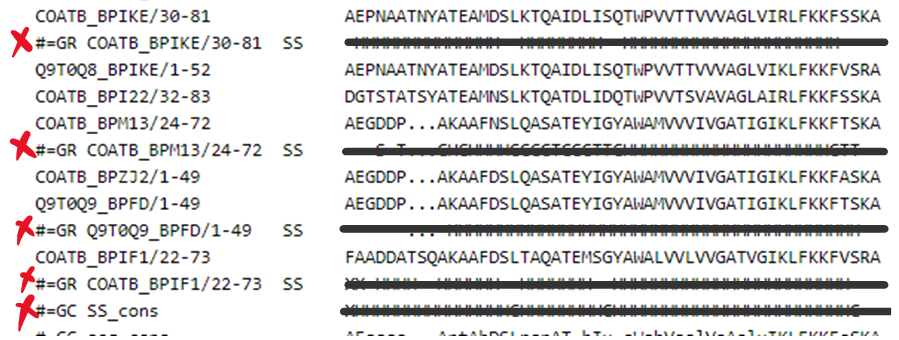


You’ll notice in the above output the sequences have been truncated. We
could instead write our own code to format this as we please by
iterating over the rows as `SeqRecord` objects:



In [7]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
print("Alignment length %i" % alignment.get_alignment_length())

Alignment length 52


In [9]:
for record in alignment:
    print("%s - %s" % (record.seq, record.id))

AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


You could also use the alignment object’s `format` method to show it in
a particular file format
for details.

In [10]:
print(alignment.format("fasta"))

>COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA
>Q9T0Q8_BPIKE/1-52
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA
>COATB_BPI22/32-83
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA
>COATB_BPM13/24-72
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
>COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA
>Q9T0Q9_BPFD/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
>COATB_BPIF1/22-73
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA



C:\Users\Eli\Anaconda3\lib\site-packages\Bio\Align\__init__.py:308: BiopythonDeprecationWarning: alignment.format has been deprecated, and we intend to remove it in a future release of Biopython. Instead of alignment.format(format_spec), please use format(alignment, format_spec) or an f-string.
  BiopythonDeprecationWarning,


In [12]:
print(format(alignment,'fasta'))

>COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA
>Q9T0Q8_BPIKE/1-52
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA
>COATB_BPI22/32-83
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA
>COATB_BPM13/24-72
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
>COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA
>Q9T0Q9_BPFD/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
>COATB_BPIF1/22-73
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA



Did you notice in the raw file above that several of the sequences
include database cross-references to the PDB and the associated known
secondary structure? Try this:

In [5]:
for record in alignment:
    if record.dbxrefs:
        print("%s %s" % (record.id, record.dbxrefs))

COATB_BPIKE/30-81 ['PDB; 1ifl ; 1-52;']
COATB_BPM13/24-72 ['PDB; 2cpb ; 1-49;', 'PDB; 2cps ; 1-49;']
Q9T0Q9_BPFD/1-49 ['PDB; 1nh4 A; 1-49;']
COATB_BPIF1/22-73 ['PDB; 1ifk ; 1-50;']



To have a look at all the sequence annotation, try this:



In [16]:
for record in alignment:
    print(record)
    break

ID: COATB_BPIKE/30-81
Name: COATB_BPIKE
Description: COATB_BPIKE/30-81
Database cross-references: PDB; 1ifl ; 1-52;
Number of features: 0
/accession=P03620.1
/start=30
/end=81
Per letter annotation for: secondary_structure
Seq('AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA')


Los alineamientos también se pueden leer en formato fasta pero **se pierden las anotaciones de otras bases de datos** ya que no vienen en el fasta



In [17]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.faa", "fasta")
print(alignment)


Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


All that has changed in this code is the filename and the format string.
You’ll get the same output as before, the sequences and record
identifiers are the same. However, as you should expect, if you check
each `SeqRecord` there is no annotation nor database cross-references
because these are not included in the FASTA file format.

### Otros formatos:
With any supported file format, you can load an alignment in exactly the
same way just by changing the format string. For example, use “phylip”
for PHYLIP files, “nexus” for NEXUS files or “emboss” for the alignments
output by the EMBOSS tools. There is a full listing on the wiki page
(<http://biopython.org/wiki/AlignIO>) and in the built in documentation
(also
[online](http://biopython.org/DIST/docs/api/Bio.AlignIO-module.html)):

In [18]:
#from Bio import AlignIO
#help(AlignIO)

<a id="Muchos"></a>

## <span style="color:#957DAD">Multiple Alignments</span>

The previous section focused on reading files containing a single
alignment. In general however, files can contain more than one
alignment, and to read these files we must use the `Bio.AlignIO.parse()`
function.




PHYLIP  
The header consists of a single line describing the dimensions of the alignment. It must be the first line in the file. The header consists of optional spaces, followed by two positive integers (n and m) separated by one or more spaces. The first integer (n) specifies the number of sequences (i.e., the number of rows) in the alignment. The second integer (m) specifies the length of the sequences (i.e., the number of columns) in the alignment. The smallest supported alignment dimensions are 1x1.


```
5     6
Alpha     AAACCA
Beta      AAACCC
Gamma     ACCCCA
Delta     CCCAAC
Epsilon   CCCAAA
    5     6
Alpha     AAACAA
Beta      AAACCC
Gamma     ACCCAA
Delta     CCCACC
Epsilon   CCCAAA
    5     6
Alpha     AAAAAC
Beta      AAACCC
Gamma     AACAAC
Delta     CCCCCA
Epsilon   CCCAAC
...
    5     6
Alpha     AAAACC
Beta      ACCCCC
Gamma     AAAACC
Delta     CCCCAA
Epsilon   CAAACC

```


If you wanted to read this in using `Bio.AlignIO` you could use:



In [19]:
from Bio import AlignIO
alignments = AlignIO.parse("resampled.phy", "phylip")
for alignment in alignments:
    print(alignment)
    print("")

Alignment with 5 rows and 6 columns
AAACCA Alpha
AAACCC Beta
ACCCCA Gamma
CCCAAC Delta
CCCAAA Epsilon

Alignment with 5 rows and 6 columns
AAACAA Alpha
AAACCC Beta
ACCCAA Gamma
CCCACC Delta
CCCAAA Epsilon

Alignment with 5 rows and 6 columns
AAAAAC Alpha
AAACCC Beta
AACAAC Gamma
CCCCCA Delta
CCCAAC Epsilon

Alignment with 5 rows and 6 columns
AAAACC Alpha
ACCCCC Beta
AAAACC Gamma
CCCCAA Delta
CAAACC Epsilon




As with the function `Bio.SeqIO.parse()`, using `Bio.AlignIO.parse()`
returns an iterator. If you want to keep all the alignments in memory at
once, which will allow you to access them in any order, then turn the
iterator into a list:



In [22]:
from Bio import AlignIO
alignments = list(AlignIO.parse("resampled.phy", "phylip"))
last_align = alignments[-1]
first_align = alignments[0]

In [24]:
print(last_align)

Alignment with 5 rows and 6 columns
AAAACC Alpha
ACCCCC Beta
AAAACC Gamma
CCCCAA Delta
CAAACC Epsilon


<a id="Ambiguo"></a>
# <span style="color:#D291BC">Ambiguous Alignments</span>
-----------------------

Many alignment file formats can explicitly store more than one
alignment, and the division between each alignment is clear. However,
when a general sequence file format has been used there is no such block
structure. The most common such situation is when alignments have been
saved in the FASTA file format. For example consider the following:



```
>Alpha
ACTACGACTAGCTCAG--G
>Beta
ACTACCGCTAGCTCAGAAG
>Gamma
ACTACGGCTAGCACAGAAG
>Alpha
ACTACGACTAGCTCAGG--
>Beta
ACTACCGCTAGCTCAGAAG
>Gamma
ACTACGGCTAGCACAGAAG

```


This could be a single alignment containing six sequences (with repeated
identifiers). Or, judging from the identifiers, this is probably two
different alignments each with three sequences, which happen to all have
the same length.

What about this next example?



```
>Alpha
ACTACGACTAGCTCAG--G
>Beta
ACTACCGCTAGCTCAGAAG
>Alpha
ACTACGACTAGCTCAGG--
>Gamma
ACTACGGCTAGCACAGAAG
>Alpha
ACTACGACTAGCTCAGG--
>Delta
ACTACGGCTAGCACAGAAG

```


Again, this could be a single alignment with six sequences. However this
time based on the identifiers we might guess this is three pairwise
alignments which by chance have all got the same lengths.

This final example is similar:



```
>Alpha
ACTACGACTAGCTCAG--G
>XXX
ACTACCGCTAGCTCAGAAG
>Alpha
ACTACGACTAGCTCAGG
>YYY
ACTACGGCAAGCACAGG
>Alpha
--ACTACGAC--TAGCTCAGG
>ZZZ
GGACTACGACAATAGCTCAGG

```


In this third example, because of the differing lengths, this cannot be
treated as a single alignment containing all six records. However, it
could be three pairwise alignments.

Clearly trying to store more than one alignment in a FASTA file is not
ideal. However, if you are forced to deal with these as input files
`Bio.AlignIO` can cope with the most common situation where all the
alignments have the same number of records.

To interpret these FASTA examples as several separate alignments, we can
use `Bio.AlignIO.parse()` with the optional `seq_count` argument which
specifies how many sequences are expected in each alignment (in these
examples, 3, 2 and 2 respectively). For example, using the third example
as the input data:



In [26]:
for alignment in AlignIO.parse('Ambiguo.fa', "fasta", seq_count=2):
    print("Alignment length %i" % alignment.get_alignment_length())
    for record in alignment:
        print("%s - %s" % (record.seq, record.id))
    print("")


Alignment length 19
ACTACGACTAGCTCAG--G - Alpha
ACTACCGCTAGCTCAGAAG - XXX

Alignment length 17
ACTACGACTAGCTCAGG - Alpha
ACTACGGCAAGCACAGG - YYY

Alignment length 21
--ACTACGAC--TAGCTCAGG - Alpha
GGACTACGACAATAGCTCAGG - ZZZ



Using `Bio.AlignIO.read()` or `Bio.AlignIO.parse()` without the
`seq_count` argument would give a single alignment containing all six
records for the first two examples. For the third example, an exception
would be raised because the lengths differ preventing them being turned
into a single alignment.


Note that this optional `seq_count` **argument assumes each alignment in
the file has the same number of sequences**. Hypothetically you may come
across stranger situations, for example a FASTA file containing several
alignments each with a different number of sequences – although I would
love to hear of a real world example of this. 

<a id="Escribir"></a>
# <span style="color:#D291BC">Writing Alignments</span>
------------------

We’ve talked about using `Bio.AlignIO.read()` and `Bio.AlignIO.parse()`
for alignment input (reading files), and now we’ll look at
`Bio.AlignIO.write()` which is for alignment output (writing files).
This is a function taking three arguments: some `MultipleSeqAlignment`
objects (or for backwards compatibility the obsolete `Alignment`
objects), a handle or filename to write to, and a sequence format.

Here is an example, where we start by creating a few
`MultipleSeqAlignment` objects the hard way (by hand, rather than by
loading them from a file). Note we create some `SeqRecord` objects to
construct the alignment from.

In [29]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

align1 = MultipleSeqAlignment([
             SeqRecord(Seq("ACTGCTAGCTAG"), id="Alpha"),
             SeqRecord(Seq("ACT-CTAGCTAG"), id="Beta"),
             SeqRecord(Seq("ACTGCTAGDTAG"), id="Gamma"),
         ])

align2 = MultipleSeqAlignment([
             SeqRecord(Seq("GTCAGC-AG"), id="Delta"),
             SeqRecord(Seq("GACAGCTAG"), id="Epsilon"),
             SeqRecord(Seq("GTCAGCTAG"), id="Zeta"),
         ])

align3 = MultipleSeqAlignment([
             SeqRecord(Seq("ACTAGTACAGCTG"), id="Eta"),
             SeqRecord(Seq("ACTAGTACAGCT-"), id="Theta"),
             SeqRecord(Seq("-CTACTACAGGTG"), id="Iota"),
         ])

my_alignments = [align1, align2, align3]

In [32]:
my_alignments

[<<class 'Bio.Align.MultipleSeqAlignment'> instance (3 records of length 12) at 1e0db30a148>,
 <<class 'Bio.Align.MultipleSeqAlignment'> instance (3 records of length 9) at 1e0db30a688>,
 <<class 'Bio.Align.MultipleSeqAlignment'> instance (3 records of length 13) at 1e0db30ad88>]


Now we have a list of `Alignment` objects, we’ll write them to a PHYLIP
format file:



In [33]:
from Bio import AlignIO
AlignIO.write(my_alignments, "my_example.phy", "phylip")

3

In [34]:
%%bash
less my_example.phy

 3 12
Alpha      ACTGCTAGCT AG
Beta       ACT-CTAGCT AG
Gamma      ACTGCTAGDT AG
 3 9
Delta      GTCAGC-AG
Epsilon    GACAGCTAG
Zeta       GTCAGCTAG
 3 13
Eta        ACTAGTACAG CTG
Theta      ACTAGTACAG CT-
Iota       -CTACTACAG GTG


-----------------

<a id="Conversion"></a>

# <span style="color:#D291BC">Converting between sequence alignment file formats
</span>

-----------------
Converting between sequence alignment file formats with `Bio.AlignIO`
works in the same way as converting between sequence file formats with
`Bio.SeqIO` (Section \[sec:SeqIO-conversion\]). We load generally the
alignment(s) using `Bio.AlignIO.parse()` and then save them using the
`Bio.AlignIO.write()` – or just use the `Bio.AlignIO.convert()` helper
function.

For this example, we’ll load the PFAM/Stockholm format file used earlier
and save it as a Clustal W format file:



In [35]:
from Bio import AlignIO
count = AlignIO.convert("PF05371_seed.sth", "stockholm", "PF05371_seed.aln", "clustal")
print("Converted %i alignments" % count)

Converted 1 alignments


In [36]:
%%bash 
less PF05371_seed.aln

CLUSTAL X (1.81) multiple sequence alignment


COATB_BPIKE/30-81                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSS
Q9T0Q8_BPIKE/1-52                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVS
COATB_BPI22/32-83                   DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSS
COATB_BPM13/24-72                   AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPZJ2/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFAS
Q9T0Q9_BPFD/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPIF1/22-73                   FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVS

COATB_BPIKE/30-81                   KA
Q9T0Q8_BPIKE/1-52                   RA
COATB_BPI22/32-83                   KA
COATB_BPM13/24-72                   KA
COATB_BPZJ2/1-49                    KA
Q9T0Q9_BPFD/1-49                    KA
COATB_BPIF1/22-73                   RA




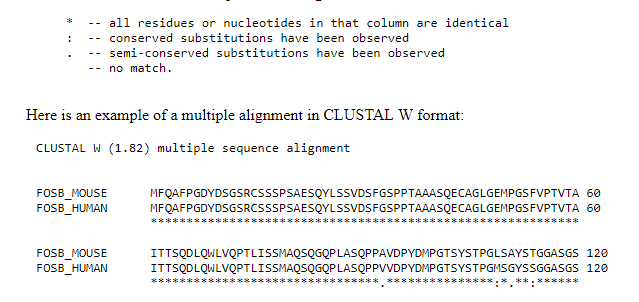


Or, using `Bio.AlignIO.parse()` and `Bio.AlignIO.write()`:



In [37]:
from Bio import AlignIO
alignments = AlignIO.parse("PF05371_seed.sth", "stockholm")
count = AlignIO.write(alignments, "PF05371_seed.aln", "clustal")
print("Converted %i alignments" % count)

Converted 1 alignments



The `Bio.AlignIO.write()` function expects to be given multiple
alignment objects. In the example above we gave it the alignment
iterator returned by `Bio.AlignIO.parse()`.

In this case, we know there is only one alignment in the file so we
could have used `Bio.AlignIO.read()` instead, but notice we have to pass
this alignment to `Bio.AlignIO.write()` as a single element list:



In [38]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
AlignIO.write([alignment], "PF05371_seed.aln", "clustal")

1


Alternatively, you could make a PHYLIP format file which we’ll name
“PF05371\_seed.phy”:



In [40]:
from Bio import AlignIO
AlignIO.convert("PF05371_seed.sth", "stockholm", "PF05371_seed.phy", "phylip")

1

In [41]:
%%bash
less PF05371_seed.phy

 7 52
COATB_BPIK AEPNAATNYA TEAMDSLKTQ AIDLISQTWP VVTTVVVAGL VIRLFKKFSS
Q9T0Q8_BPI AEPNAATNYA TEAMDSLKTQ AIDLISQTWP VVTTVVVAGL VIKLFKKFVS
COATB_BPI2 DGTSTATSYA TEAMNSLKTQ ATDLIDQTWP VVTSVAVAGL AIRLFKKFSS
COATB_BPM1 AEGDDP---A KAAFNSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFTS
COATB_BPZJ AEGDDP---A KAAFDSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFAS
Q9T0Q9_BPF AEGDDP---A KAAFDSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFTS
COATB_BPIF FAADDATSQA KAAFDSLTAQ ATEMSGYAWA LVVLVVGATV GIKLFKKFVS

           KA
           RA
           KA
           KA
           KA
           KA
           RA



One of the big handicaps of the original PHYLIP alignment file format is
that the sequence identifiers are strictly truncated at ten characters.
In this example, as you can see the resulting names are still unique -
but they are not very readable. As a result, a more relaxed variant of
the original PHYLIP format is now quite widely used:



In [43]:
from Bio import AlignIO
AlignIO.convert("PF05371_seed.sth", "stockholm", "PF05371_seed.phy", "phylip-relaxed")

1

In [44]:
%%bash
less PF05371_seed.phy

 7 52
COATB_BPIKE/30-81  AEPNAATNYA TEAMDSLKTQ AIDLISQTWP VVTTVVVAGL VIRLFKKFSS
Q9T0Q8_BPIKE/1-52  AEPNAATNYA TEAMDSLKTQ AIDLISQTWP VVTTVVVAGL VIKLFKKFVS
COATB_BPI22/32-83  DGTSTATSYA TEAMNSLKTQ ATDLIDQTWP VVTSVAVAGL AIRLFKKFSS
COATB_BPM13/24-72  AEGDDP---A KAAFNSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFTS
COATB_BPZJ2/1-49   AEGDDP---A KAAFDSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFAS
Q9T0Q9_BPFD/1-49   AEGDDP---A KAAFDSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFTS
COATB_BPIF1/22-73  FAADDATSQA KAAFDSLTAQ ATEMSGYAWA LVVLVVGATV GIKLFKKFVS

                   KA
                   RA
                   KA
                   KA
                   KA
                   KA
                   RA



If you have to work with the original strict PHYLIP format, then you may
need to compress the identifers somehow – or assign your own names or
numbering system. This following bit of code manipulates the record
identifiers before saving the output:



In [48]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")

name_mapping = {} # Diccionario para guardar el nombre original y el nuevo
for i, record in enumerate(alignment):
    
    #Nuevo nombre = Viejo nombre
    name_mapping["seq_"+str(i)] = record.id

    record.id = "seq%i" % i #Modificamos el nombre
    
    
print(name_mapping)

AlignIO.write([alignment], "PF05371_seed_2.phy", "phylip")

{'seq_0': 'COATB_BPIKE/30-81', 'seq_1': 'Q9T0Q8_BPIKE/1-52', 'seq_2': 'COATB_BPI22/32-83', 'seq_3': 'COATB_BPM13/24-72', 'seq_4': 'COATB_BPZJ2/1-49', 'seq_5': 'Q9T0Q9_BPFD/1-49', 'seq_6': 'COATB_BPIF1/22-73'}


1

In [47]:
%%bash
less PF05371_seed_2.phy

 7 52
seq0       AEPNAATNYA TEAMDSLKTQ AIDLISQTWP VVTTVVVAGL VIRLFKKFSS
seq1       AEPNAATNYA TEAMDSLKTQ AIDLISQTWP VVTTVVVAGL VIKLFKKFVS
seq2       DGTSTATSYA TEAMNSLKTQ ATDLIDQTWP VVTSVAVAGL AIRLFKKFSS
seq3       AEGDDP---A KAAFNSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFTS
seq4       AEGDDP---A KAAFDSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFAS
seq5       AEGDDP---A KAAFDSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFTS
seq6       FAADDATSQA KAAFDSLTAQ ATEMSGYAWA LVVLVVGATV GIKLFKKFVS

           KA
           RA
           KA
           KA
           KA
           KA
           RA



Here is the new (strict) PHYLIP format output:



```
7 52
seq0       AEPNAATNYA TEAMDSLKTQ AIDLISQTWP VVTTVVVAGL VIRLFKKFSS
seq1       AEPNAATNYA TEAMDSLKTQ AIDLISQTWP VVTTVVVAGL VIKLFKKFVS
seq2       DGTSTATSYA TEAMNSLKTQ ATDLIDQTWP VVTSVAVAGL AIRLFKKFSS
seq3       AEGDDP---A KAAFNSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFTS
seq4       AEGDDP---A KAAFDSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFAS
seq5       AEGDDP---A KAAFDSLQAS ATEYIGYAWA MVVVIVGATI GIKLFKKFTS
seq6       FAADDATSQA KAAFDSLTAQ ATEMSGYAWA LVVLVVGATV GIKLFKKFVS

           KA
           RA
           KA
           KA
           KA
           KA
           RA

```

In general, because of the identifier limitation, working with *strict*
PHYLIP file formats shouldn’t be your first choice. **Using the
PFAM/Stockholm format on the other hand allows you to record a lot of
additional annotation too.**

------------------

<a id="Manipulacion"></a>
# <span style="color:#D291BC">Manipulating Alignments</span>
-----------------------



### Slicing alignments

First of all, in some senses the alignment objects act like a Python
`list` of `SeqRecord` objects (the rows). With this model in mind
hopefully the actions of `len()` (the number of rows) and iteration
(each row as a `SeqRecord`) make sense:



In [49]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
print("Number of rows: %i" % len(alignment))

Number of rows: 7


In [18]:
for record in alignment:
    print("%s - %s" % (record.seq, record.id))

AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


You can also use the list-like `append` methods to add more
rows to the alignment (as `SeqRecord` objects). 

In [50]:
record.seq

Seq('FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA')

In [53]:
record.id

'seq6'

In [51]:
alignment.append(record)

In [52]:
for record in alignment:
    print("%s - %s" % (record.seq, record.id))

AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - seq6


Keeping the list
metaphor in mind, simple slicing of the alignment should also make sense it selects some of the rows giving back another alignment object:

In [55]:
print(alignment)

Alignment with 8 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA seq6


In [56]:
print(alignment[3:7])

Alignment with 4 rows and 52 columns
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73



What if you wanted to select by column? Those of you who have used the
NumPy matrix or array objects won’t be surprised at this - you use a
double index.



In [59]:
print(alignment[2,6])

T


In [60]:
print(alignment[2,6:10])

ID: COATB_BPI22/32-83
Name: COATB_BPI22
Description: COATB_BPI22/32-83
Number of features: 0
Seq('TSYA')



Using two integer indices pulls out a single letter, short hand for
this:



In [62]:
print(alignment[2].seq[6])

T


In [61]:
print(alignment[2].seq[6:10])

TSYA



You can pull out a single column as a string like this:



In [63]:
print(alignment[:, 6])

TTT---TT


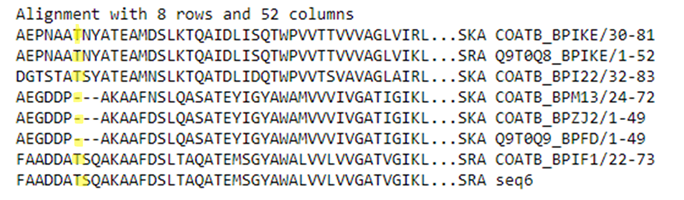


You can also select a range of columns. For example, to pick out those
same three rows we extracted earlier, but take just their first six
columns:



In [64]:
print(alignment[3:6, :6])

Alignment with 3 rows and 6 columns
AEGDDP COATB_BPM13/24-72
AEGDDP COATB_BPZJ2/1-49
AEGDDP Q9T0Q9_BPFD/1-49


In [65]:
print(alignment[:, 3:6])

Alignment with 8 rows and 3 columns
NAA COATB_BPIKE/30-81
NAA Q9T0Q8_BPIKE/1-52
STA COATB_BPI22/32-83
DDP COATB_BPM13/24-72
DDP COATB_BPZJ2/1-49
DDP Q9T0Q9_BPFD/1-49
DDA COATB_BPIF1/22-73
DDA seq6


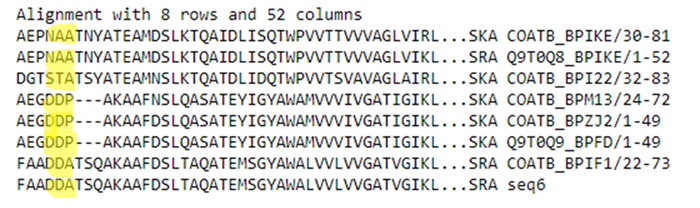


Leaving the first index as `:` means take all the rows:



In [25]:
print(alignment[:, :6])

SingleLetterAlphabet() alignment with 7 rows and 6 columns
AEPNAA COATB_BPIKE/30-81
AEPNAA Q9T0Q8_BPIKE/1-52
DGTSTA COATB_BPI22/32-83
AEGDDP COATB_BPM13/24-72
AEGDDP COATB_BPZJ2/1-49
AEGDDP Q9T0Q9_BPFD/1-49
FAADDA COATB_BPIF1/22-73



This brings us to a neat way to remove a section. Notice columns 7, 8
and 9 which are gaps in three of the seven sequences:



In [26]:
print(alignment[:, 6:9])

SingleLetterAlphabet() alignment with 7 rows and 3 columns
TNY COATB_BPIKE/30-81
TNY Q9T0Q8_BPIKE/1-52
TSY COATB_BPI22/32-83
--- COATB_BPM13/24-72
--- COATB_BPZJ2/1-49
--- Q9T0Q9_BPFD/1-49
TSQ COATB_BPIF1/22-73



Again, you can slice to get everything after the ninth column:



In [27]:
print(alignment[:, 9:])

SingleLetterAlphabet() alignment with 7 rows and 43 columns
ATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA COATB_BPIKE/30-81
ATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA Q9T0Q8_BPIKE/1-52
ATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA COATB_BPI22/32-83
AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA COATB_BPM13/24-72
AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA COATB_BPZJ2/1-49
AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA Q9T0Q9_BPFD/1-49
AKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA COATB_BPIF1/22-73



Now, the interesting thing is that addition of alignment objects works
by column. This lets you do this as a way to remove a block of columns:



In [28]:
edited = alignment[:, :6] + alignment[:, 9:]
print(edited)

SingleLetterAlphabet() alignment with 7 rows and 49 columns
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA COATB_BPIKE/30-81
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA Q9T0Q8_BPIKE/1-52
DGTSTAATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA COATB_BPI22/32-83
AEGDDPAKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA COATB_BPM13/24-72
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA COATB_BPZJ2/1-49
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA Q9T0Q9_BPFD/1-49
FAADDAAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA COATB_BPIF1/22-73



Another common use of alignment addition would be to combine alignments
for several different genes into a meta-alignment. Watch out though -
the identifiers need to match up (see Section \[sec:SeqRecord-addition\]
for how adding `SeqRecord` objects works). You may find it helpful to
first sort the alignment rows alphabetically by id:



In [29]:
edited.sort()
print(edited)

SingleLetterAlphabet() alignment with 7 rows and 49 columns
DGTSTAATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA COATB_BPI22/32-83
FAADDAAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA COATB_BPIF1/22-73
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA COATB_BPIKE/30-81
AEGDDPAKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA COATB_BPM13/24-72
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA COATB_BPZJ2/1-49
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA Q9T0Q8_BPIKE/1-52
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA Q9T0Q9_BPFD/1-49


<div class="alert alert-block alert-danger">
<b></b> Note that you can only add two alignments together if they have the same
number of rows.
</div>

In [14]:
# Make an example alignment object
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

align = MultipleSeqAlignment([
             SeqRecord(Seq("ACTGCTAGCTAG"), id="Alpha"),
             SeqRecord(Seq("ACT-CTAGCTAG"), id="Beta"),
             SeqRecord(Seq("ACTGCTAGDTAG"), id="Gamma"),
         ])

from Bio.Align import AlignInfo
summary_align = AlignInfo.SummaryInfo(align)
consensus = summary_align.dumb_consensus()

In [15]:
consensus


Seq('ACTGCTAGXTAG')

<a id="Herramientas"></a>
# <span style="color:#D291BC">Alignment Tools</span>
---------------

There are *lots* of algorithms out there for aligning sequences, both
pairwise alignments and multiple sequence alignments. These calculations
are relatively slow, and you generally wouldn’t want to write such an
algorithm in Python. Instead, you can use Biopython to invoke a command
line tool on your behalf. Normally you would:

1.  Prepare an input file of your unaligned sequences, typically this
    will be a FASTA file which you might create using `Bio.SeqIO`
    (see Chapter \[chapter:Bio.SeqIO\]).

2.  Call the command line tool to process this input file, typically via
    one of Biopython’s command line wrappers (which we’ll discuss here).

3.  Read the output from the tool, i.e. your aligned sequences,
    typically using `Bio.AlignIO` (see earlier in this chapter).

All the command line wrappers we’re going to talk about in this chapter
follow the same style. You create a command line object specifying the
options (e.g. the input filename and the output filename), then invoke
this command line via a Python operating system call (e.g. using the
`subprocess` module).

Most of these wrappers are defined in the `Bio.Align.Applications`
module:



In [32]:
import Bio.Align.Applications
dir(Bio.Align.Applications)

['ClustalOmegaCommandline',
 'ClustalwCommandline',
 'DialignCommandline',
 'MSAProbsCommandline',
 'MafftCommandline',
 'MuscleCommandline',
 'PrankCommandline',
 'ProbconsCommandline',
 'TCoffeeCommandline',
 '_ClustalOmega',
 '_Clustalw',
 '_Dialign',
 '_MSAProbs',
 '_Mafft',
 '_Muscle',
 '_Prank',
 '_Probcons',
 '_TCoffee',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

(Ignore the entries starting with an underscore – these have special
meaning in Python.) The module `Bio.Emboss.Applications` has wrappers
for some of the [EMBOSS suite](http://emboss.sourceforge.net/),
including `needle` and `water`, which are described below in
Section \[seq:emboss-needle-water\], and wrappers for the EMBOSS
packaged versions of the PHYLIP tools (which EMBOSS refer to as one of
their EMBASSY packages - third party tools with an EMBOSS style
interface). We won’t explore all these alignment tools here in the
section, just a sample, but the same principles apply.


In case you are interested (and this is an aside from the main thrust of
this chapter), the `opuntia.dnd` file ClustalW creates is just a
standard Newick tree file, and `Bio.Phylo` can parse these:



In [39]:
from Bio import Phylo
tree = Phylo.read("data/opuntia.dnd", "newick")
Phylo.draw_ascii(tree)

                             _______________ gi|6273291|gb|AF191665.1|AF191665
  __________________________|
 |                          |   ______ gi|6273290|gb|AF191664.1|AF191664
 |                          |__|
 |                             |_____ gi|6273289|gb|AF191663.1|AF191663
 |
_|_________________ gi|6273287|gb|AF191661.1|AF191661
 |
 |__________ gi|6273286|gb|AF191660.1|AF191660
 |
 |    __ gi|6273285|gb|AF191659.1|AF191659
 |___|
     | gi|6273284|gb|AF191658.1|AF191658



Chapter \[sec:Phylo\] covers Biopython’s support for phylogenetic trees
in more depth.

-----------------------

------------------------

In [4]:

from urllib.request import urlopen
from urllib.parse import urlencode

def scan(seq="", mirror="https://prosite.expasy.org", output="xml", **keywords):
    
    #Borré la descripción de la función solo para que la visualización de los cambios fuera más sencilla
    parameters = {"seq": seq, "output": output}
    
    ##Cambio para solo usar sig
    if seq is None:
        parameters = {"output": output}
    ##
    
    for key, value in keywords.items():
        if value is not None:
            parameters[key] = value

        
    command = urlencode(parameters)
    url = "%s/cgi-bin/prosite/PSScan.cgi?%s" % (mirror, command)
    print(url)
    handle = urlopen(url)
    return handle

<a id="Ejercicio"></a>
<div class="alert alert-block alert-info">
<h2 id="problem">Ejercicio</h2>
    

</div>


## Tenemos una secuencia y su alineamiento con secuencias parecidas. ¿De qué organismo proviene mi secuencia y hay dominios conservados?

El archivo de alineamiento es inventado, solo es para facilitar el ejercicio

###  Primero realizamos un BLAST para saber de qué organismo viene nuestra secuencia

<div class="alert alert-block alert-danger">
<b>OJO</b> No lo corran, hay un output de ejemplo .
</div>

In [ ]:
# Recuerden revisar si es un archivo de nucleótidos o de proteínas
from Bio.Blast import NCBIWWW
fasta_string = open("unknown.fasta").____()
result_handle = NCBIWWW.qblast("____", "nt", ____)


#for blast_result in NCBIXML.parse(result_handle):
#    ...


In [ ]:
from Bio.Blast import NCBIXML

result_handle = open("ZVJ05K44013-Alignment.xml")
for blast_result in NCBIXML.parse(result_handle):
    for desc in blast_result.____:
        if desc.e < 1e-5:
            print('sequence:', desc.____) #impriman el título para ver con qué organismo hizo hit 


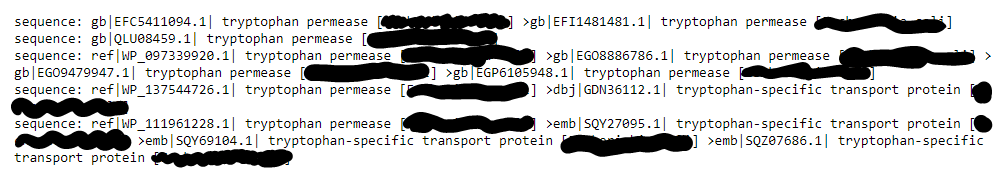

### Ahora veamos el archivo de alineamiento (No es el alineamiento del blast, es un alineamiento con secuencias parecidas de otros organismos)

¿en qué formato está?

In [40]:
%%bash 
head ejercicio.phy

 4 64
Unknown_se IGAGMFSLPV VMSGAWF--- AD-T-TAT-Y ATEA--NSL- TQATDL-DQT
Seq_2      IGGGMLSWPW AFAGFAF--- GAEGDDP--- AKAAFD-LQA SA---IGYAW
Seq_3      IGGGMLAVPG SISGPMF--- FA-GDDP--- AKAAF----A SATEY--YAW
Seq_4      IGAGMFAGPP LTAGISF--- AFAA--ATSQ AK-AFDSL-A QATEMSG---

           W--VTSVAVA G--K
           ---VVI--AT IGI-
           AMVVVIVG-- --IK
           --V-LVVGAT VGIK


In [43]:
from Bio import AlignIO
alignments = AlignIO.____("ejercicio.phy", "____")
print(alignment)

Alignment with 4 rows and 64 columns
IGAGMFSLPVVMSGAWF---AD-T-TAT-YATEA--NSL-TQAT...--K Unknown_se
IGGGMLSWPWAFAGFAF---GAEGDDP---AKAAFD-LQASA--...GI- Seq_2
IGGGMLAVPGSISGPMF---FA-GDDP---AKAAF----ASATE...-IK Seq_3
IGAGMFAGPPLTAGISF---AFAA--ATSQAK-AFDSL-AQATE...GIK Seq_4


### Quedémonos con la parte más conservada

In [ ]:
# Esto es solo como recomendación, para buscar dónde empieza o termina la secuencia que me interesa
alignment[0].seq.find(____)

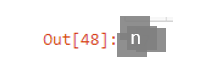

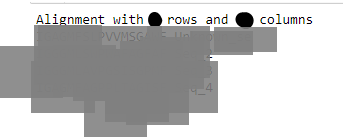

### Obtengamos una secuencia consenso provicional de la parte conservada

In [57]:
from Bio.Align import AlignInfo

summary_align = AlignInfo.SummaryInfo(____)
consensus = summary_align.____()

In [ ]:
consensus

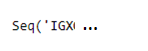

### Escribámosla al estilo Prosite para buscarla
Ej. AMXLPXXXGXX se convierte en:
A-M-x-L-P-x(3)-G-x(2)

In [ ]:
'I-G-x-...

### Busquen la secuencia e impriman los primeros 3 resultados

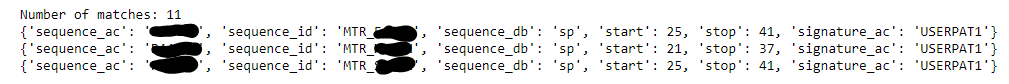

### Ya sabemos cuál es nuestro organismo, así que ahora usamos el sequene_ac de ese organismo para ver qué dominios tiene reportados

In [64]:
from Bio.ExPASy import ScanProsite

uniprot_id = "____" 
handle = ScanProsite.scan(seq=uniprot_id)
results = ScanProsite.read(handle)

In [ ]:
print ("Number of matches:", results.n_match)
for r in results:
    print (r)


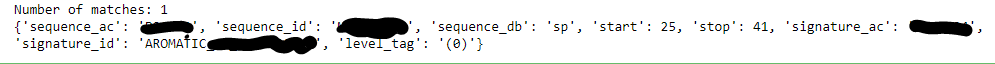

### Ya tengo el signature_ac para buscar la información de prosite, ahora obtengan el nombre y el patrón de ese resultado. ¿Coincide con la parte conservada del alineamiento?

In [ ]:
from Bio import ExPASy
from Bio.ExPASy import Prosite

handle = ExPASy.get_prosite_raw("____")
record = Prosite.read(handle)
print (record.____) # Nombre
print (record.____) # Patrón


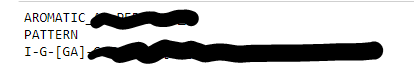

### ¿Para qué sirve?

In [ ]:
# Obtenemos la documentación
record.____

In [ ]:
# Buscamos la documentación en prosite

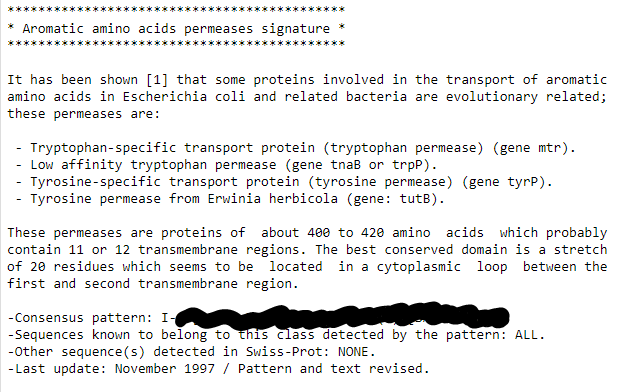